## 1. Dropping constant features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({"A": [1,2,4,1,2,4], "B":[4,5,6,7,8,9], "C":[0,0,0,0,0,0], "D":[1,1,1,1,1,1]})

 #### Variance Threshold
  
Feature Selector that removes all low-variance features. This feature selection alorithm looks only at the features(X), not thr desired outputs(y) and thus can be used in unsupervised learning.

In [3]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [4]:
 var_thres.get_support()

array([ True,  True, False, False])

this means that last two columns got removed

In [5]:
df.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [6]:
constant_coolumns = [column for column in df.columns if column not in df.columns[var_thres.get_support()]]

In [7]:
len(constant_coolumns)

2

In [8]:
for feature in constant_coolumns:
    print(feature)

C
D


In [9]:
df.drop(constant_coolumns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


## 2. Using Correlation

In [13]:
from sklearn.datasets import load_boston

In [14]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MEDV"] = data.target

In [15]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

High correlation between independent and dependent variables need not to be removed

In [16]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

<IPython.core.display.Javascript object>

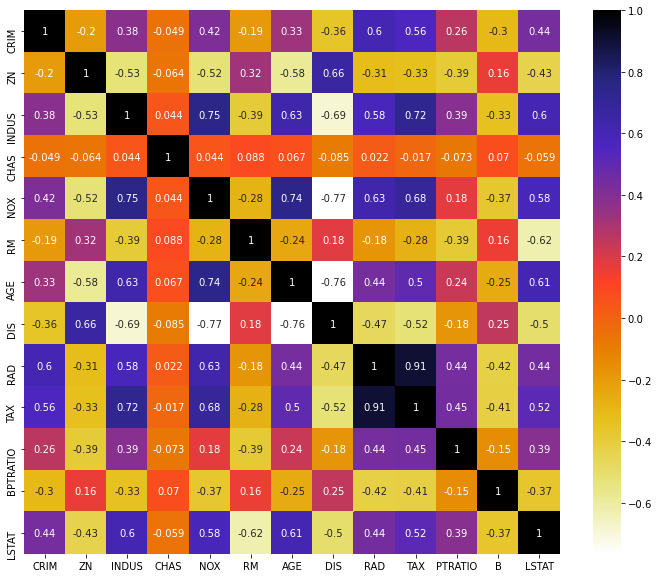

In [20]:
#checking seaborn as sns
#pearson correlation
plt.figure(figsize=(12,10)) #12x10 for a bigger diagram
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

If there are independent variables highy correlated to one another then we can select only one of them so as to remove duplicacy and enhance performance of model.

For example, in the above heat map of correlation, variable "TAX" and "RAD" have 0.91 correlation so we choose either of them.

In [21]:
def correlation(dataset, threshold):
    col_corr = set()  #Set all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: #we are interested in absolute coeff value
                colname = corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [23]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [ ]:
X_train = X_train.drop(corr_features,axis=1)

In [27]:
X_train.shape

(354, 9)

## 3. How To Select Features Using Information Gain For Classification In ML

aka Mutual Information

In [ ]:
### Mutual Information

MI Estimate mutual information for a discrete target variable.

MI between two random variables is a non negative value which